In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/Users/avinash2don/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
BTC = pd.read_csv('btc.csv')

In [3]:
BTC.head()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees
0,5/1/13,1.086597e+08,52443,1.542820e+09,139.00,0,3575.0,36.806000
1,5/2/13,9.695852e+07,55169,1.292190e+09,116.38,0,3425.0,54.407916
2,5/3/13,8.445970e+07,55636,1.180070e+09,106.25,0,3650.0,48.526772
3,5/4/13,4.154584e+07,48595,1.089890e+09,98.10,0,3900.0,43.419694
4,5/5/13,5.620593e+07,49907,1.254760e+09,112.90,0,3875.0,38.408956


In [4]:
BTC.dtypes

date                    object
txVolume(USD)          float64
txCount                  int64
marketcap(USD)         float64
price(USD)             float64
exchangeVolume(USD)      int64
generatedCoins         float64
fees                   float64
dtype: object

In [5]:
BTC['date'] = pd.to_datetime(BTC['date'])

In [6]:
BTC.dtypes

date                   datetime64[ns]
txVolume(USD)                 float64
txCount                         int64
marketcap(USD)                float64
price(USD)                    float64
exchangeVolume(USD)             int64
generatedCoins                float64
fees                          float64
dtype: object

In [7]:
BTC.shape

(1820, 8)

In [8]:
data = BTC['price(USD)'].values
print('Total number of days in the dataset: {}'.format(len(data)))

Total number of days in the dataset: 1820


In [9]:
data = data.reshape(-1, 1)

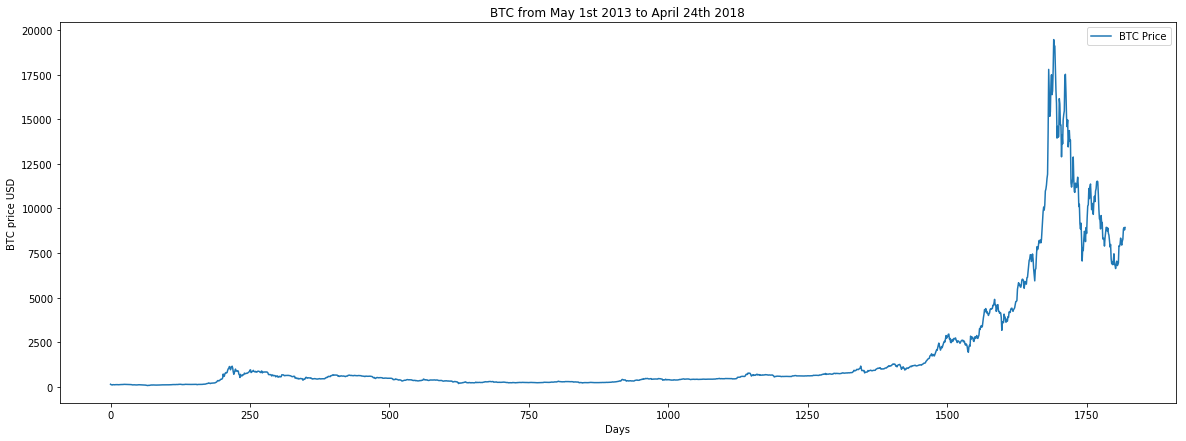

In [10]:
plt.figure(figsize=(20,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('BTC from May 1st 2013 to April 24th 2018')
plt.xlabel('Days')
plt.ylabel('BTC price USD')
plt.plot(data, label='BTC Price')
plt.legend()
plt.show()

In [11]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [12]:
X, y = window_data(data, 14)

In [13]:
X_train  = np.array(X[:1736])
y_train = np.array(y[:1736])

X_val = np.array(X[1736:1792])
y_val = np.array(y[1736:1792])


X_test = np.array(X[1792:])
y_test = np.array(y[1792:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))

print("X_val size: {}".format(X_val.shape))
print("y_val size: {}".format(y_val.shape))

print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1736, 14, 1)
y_train size: (1736, 1)
X_val size: (56, 14, 1)
y_val size: (56, 1)
X_test size: (14, 14, 1)
y_test size: (14, 1)


In [14]:
print(X_test)
print(y_test)

[[[7836.83]
  [7979.07]
  [7171.45]
  [6892.48]
  [7003.06]
  [6844.86]
  [7102.26]
  [7456.41]
  [6848.65]
  [6815.96]
  [6630.51]
  [6919.98]
  [7044.32]
  [6795.44]]

 [[7979.07]
  [7171.45]
  [6892.48]
  [7003.06]
  [6844.86]
  [7102.26]
  [7456.41]
  [6848.65]
  [6815.96]
  [6630.51]
  [6919.98]
  [7044.32]
  [6795.44]
  [6843.47]]

 [[7171.45]
  [6892.48]
  [7003.06]
  [6844.86]
  [7102.26]
  [7456.41]
  [6848.65]
  [6815.96]
  [6630.51]
  [6919.98]
  [7044.32]
  [6795.44]
  [6843.47]
  [6955.38]]

 [[6892.48]
  [7003.06]
  [6844.86]
  [7102.26]
  [7456.41]
  [6848.65]
  [6815.96]
  [6630.51]
  [6919.98]
  [7044.32]
  [6795.44]
  [6843.47]
  [6955.38]
  [7901.09]]

 [[7003.06]
  [6844.86]
  [7102.26]
  [7456.41]
  [6848.65]
  [6815.96]
  [6630.51]
  [6919.98]
  [7044.32]
  [6795.44]
  [6843.47]
  [6955.38]
  [7901.09]
  [7874.67]]

 [[6844.86]
  [7102.26]
  [7456.41]
  [6848.65]
  [6815.96]
  [6630.51]
  [6919.98]
  [7044.32]
  [6795.44]
  [6843.47]
  [6955.38]
  [7901.09]
  [787

In [15]:
epochs = 1000
batch_size = 14

In [16]:
def LSTM_cell(hidden_layer_size, batch_size,number_of_layers, dropout=True, dropout_rate=0.8):
    
    layer = tf.contrib.rnn.BasicLSTMCell(hidden_layer_size)
    
    if dropout:
        layer = tf.contrib.rnn.DropoutWrapper(layer, output_keep_prob=dropout_rate)
        
    cell = tf.contrib.rnn.MultiRNNCell([layer]*number_of_layers)
    
    init_state = cell.zero_state(batch_size, tf.float32)
    
    return cell, init_state

In [17]:
def output_layer(lstm_output, in_size, out_size):
    
    x = lstm_output[:, -1, :]
    print(x)
    weights = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.05), name='output_layer_weights')
    bias = tf.Variable(tf.zeros([out_size]), name='output_layer_bias')
    
    output = tf.matmul(x, weights) + bias
    return output

In [18]:
def opt_loss(logits, targets, learning_rate, grad_clip_margin):
    
    losses = []
    for i in range(targets.get_shape()[0]):
        losses.append([(tf.pow(logits[i] - targets[i], 2))])
        
    loss = tf.reduce_sum(losses)/(2*batch_size)
    
    #Cliping the gradient loss
    gradients = tf.gradients(loss, tf.trainable_variables())
    clipper_, _ = tf.clip_by_global_norm(gradients, grad_clip_margin)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))
    return loss, train_optimizer

In [19]:
class BTCPredictionRNN(object):
    
    def __init__(self, learning_rate=0.001, batch_size=7, hidden_layer_size=512, number_of_layers=1, 
                 dropout=True, dropout_rate=0.8, number_of_classes=1, gradient_clip_margin=4, window_size=7):
    
        self.inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1], name='input_data')
        self.targets = tf.placeholder(tf.float32, [batch_size, 1], name='targets')

        cell, init_state = LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate)

        outputs, states = tf.nn.dynamic_rnn(cell, self.inputs, initial_state=init_state)

        self.logits = output_layer(outputs, hidden_layer_size, number_of_classes)

        self.loss, self.opt = opt_loss(self.logits, self.targets, learning_rate, gradient_clip_margin)

In [20]:
tf.reset_default_graph()
model = BTCPredictionRNN()

Tensor("strided_slice:0", shape=(7, 512), dtype=float32)


In [21]:
session =  tf.Session()

In [22]:
session.run(tf.global_variables_initializer())

In [ ]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        print(X_batch)
        print(y_batch)
        print(X_batch.shape)
        print(y_batch.shape)
        o, c, _ = session.run([model.logits, model.loss, model.opt], feed_dict={model.inputs:X_batch, model.targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 30) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

In [ ]:
sup =[]
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j])

In [ ]:
tests = []
i = 0
while i+batch_size <= len(X_test):
    
    o = session.run([model.logits], feed_dict={model.inputs:X_test[i:i+batch_size]})
    i += batch_size
    tests.append(o)

In [ ]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [ ]:
test_results = []
for i in range(1813):
    if i >= 1751:
        test_results.append(tests_new[i-1751])
    else:
        test_results.append(None)

In [ ]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_dataset, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()